In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras 
from tensorflow.keras.optimizers import Adam
from PIL import Image
from tensorflow.keras.preprocessing import image

In [6]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
X_train = train_images.astype('float32') / 255.0
X_test = test_images.astype('float32') / 255.0

In [8]:
y_train = train_labels
y_test = test_labels

In [9]:
model = keras.Sequential()
model.add(keras.layers.Reshape((28, 28), input_shape=(28, 28)))
model.add(keras.layers.LSTM(128, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

C:\Users\To Learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Define a learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

In [11]:
# Create an optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

In [12]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,874 (862.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.7609 - loss: 0.7163 - val_accuracy: 0.9554 - val_loss: 0.1454
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9643 - loss: 0.1265 - val_accuracy: 0.9760 - val_loss: 0.0842
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9770 - loss: 0.0833 - val_accuracy: 0.9810 - val_loss: 0.0639
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9835 - loss: 0.0588 - val_accuracy: 0.9774 - val_loss: 0.0767
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9860 - loss: 0.0510 - val_accuracy: 0.9835 - val_loss: 0.0537
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9889 - loss: 0.0395 - val_accuracy: 0.9874 - val_loss: 0.0451
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9898 - loss: 0.0347 - val_accuracy: 0.9826 - val_loss: 0.0513
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9904 -

In [15]:
def predict_number(input_image):
    # Preprocess the input image (assuming it's a grayscale image)
    input_image = input_image.astype('float32') / 255.0
    input_image = np.reshape(input_image, (1, 28, 28))  # Reshape to match the model's input shape

    prediction = model.predict(input_image)

    predicted_number = np.argmax(prediction)

    return predicted_number

In [37]:
input_image = test_images[1]
predicted_number = predict_number(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


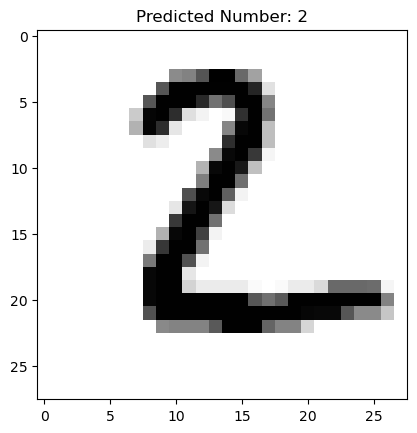

In [38]:
plt.imshow(input_image.reshape((28, 28)), cmap=plt.cm.binary)
plt.title(f"Predicted Number: {predicted_number}")
plt.show()

In [39]:
print("Predicted Number:", predicted_number)

Predicted Number: 2
